# Number Recognizer

今回は、ブラウザ上に書いた手書きの数字を認識させます。具体的には、canvasに書かれた数字が0～9のどれであるかを当てさせます。  
その予測を行うためのモデルを、以下のステップに沿って作成していきます。


* [データロード](#Load-the-Data)
* [モデル構築](#Create-the-Model)
* [学習](#Training-the-Model)
* [評価](#Evaluate-the-Model)
* [保存](#Store-the-Model)


In [1]:
# グラフが文章中に表示されるようにするおまじない
%matplotlib inline

## Load the Data

scikit-learnには、最初から手書きの数字を認識するための学習データ(手書き数字の画像データと、その画像の数字が0～9の何れであるかという答えのセット)が搭載されているため、それを利用します。

In [2]:
def load_data():
    from sklearn import datasets
    dataset = datasets.load_digits()
    return dataset

digits = load_data()
print(digits.data.shape)

(1797, 64)


`1797`は行数、`64`は次元数です。手書き文字の画像データが8×8のサイズであるため、その中のピクセル情報は64となります(今回値はグレースケールですが、RGBの場合3倍になります)。

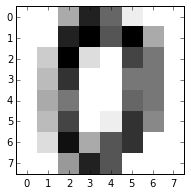

In [6]:
def show_image(image):
    import matplotlib.pyplot as plt

    plt.figure(1, figsize=(3, 3))
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.show()

show_image(digits.images[0])

## Create the Model

今回扱うのは画像の分類問題になります。そこで、シンプルな線形分類機であるSGDClassifierを利用します。

In [13]:
def make_model():
    from sklearn.linear_model import SGDClassifier    
    clf = SGDClassifier(alpha=0.0001, fit_intercept=True, n_iter=200)
    return clf
    
classifier = make_model()

## Training the Model

データとモデルがそろったため、学習させてみます。

In [23]:
classifier.fit(digits.data, digits.target)

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', n_iter=200, n_jobs=1,
       penalty='l2', power_t=0.5, random_state=None, shuffle=True,
       verbose=0, warm_start=False)

## Evaluate the Model

学習させたモデルの精度を計測してみます。`predict`で予測させることができるので、これで予測させた値と実際の答え(`digits.target`)を比べてみます。

In [24]:
def calculate_accuracy(model, dataset):
    from sklearn import metrics

    predicted = model.predict(dataset.data)
    score = metrics.accuracy_score(dataset.target, predicted)
    return score

print(calculate_accuracy(classifier, digits))

0.987200890373


## Store the Model

最後に、学習させたモデルを保存します。アプリケーション側で、その結果を確認してみてください。

In [16]:
from sklearn.externals import joblib

joblib.dump(classifier, "./machine.pkl") 

['./machine.pkl',
 './machine.pkl_01.npy',
 './machine.pkl_02.npy',
 './machine.pkl_03.npy',
 './machine.pkl_04.npy']

Classification report for classifier SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0, degree=3,
  gamma=0.001, kernel='rbf', max_iter=-1, probability=False,
  random_state=None, shrinking=True, tol=0.001, verbose=False):
             precision    recall  f1-score   support

          0       1.00      0.99      0.99        88
          1       0.99      0.97      0.98        91
          2       0.99      0.99      0.99        86
          3       0.98      0.87      0.92        91
          4       0.99      0.96      0.97        92
          5       0.95      0.97      0.96        91
          6       0.99      0.99      0.99        91
          7       0.96      0.99      0.97        89
          8       0.94      1.00      0.97        88
          9       0.93      0.98      0.95        92

avg / total       0.97      0.97      0.97       899


Confusion matrix:
[[87  0  0  0  1  0  0  0  0  0]
 [ 0 88  1  0  0  0  0  0  1  1]
 [ 0  0 85  1  0  0  0  0  0  0]
 [ 0  0  0 79 

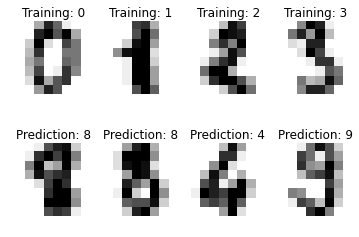

In [655]:
#machine2.pkl

# Standard scientific Python imports
import matplotlib.pyplot as plt

# Import datasets, classifiers and performance metrics
from sklearn import datasets, svm, metrics

# The digits dataset
digits = datasets.load_digits()

# The data that we are interested in is made of 8x8 images of digits, let's
# have a look at the first 3 images, stored in the `images` attribute of the
# dataset.  If we were working from image files, we could load them using
# pylab.imread.  Note that each image must have the same size. For these
# images, we know which digit they represent: it is given in the 'target' of
# the dataset.
images_and_labels = list(zip(digits.images, digits.target))

for index, (image, label) in enumerate(images_and_labels[:4]):
    plt.subplot(2, 4, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Training: %i' % label)

# 資料攤平:1797 x 8 x 8 -> 1797 x 64
# 這裏的-1代表自動計算，相當於 (n_samples, 64)
n_samples = len(digits.images) #讀出資料庫中有幾張照片
data = digits.images.reshape((n_samples, -1))

# 產生SVC分類器
classifier = svm.SVC(gamma=0.001)

# 用前半部份的資料來訓練
classifier.fit(data[:n_samples / 2], digits.target[:n_samples / 2])

# Now predict the value of the digit on the second half:
expected = digits.target[n_samples / 2:]
#利用後半部份的資料來測試分類器，共 899筆資料
predicted = classifier.predict(data[n_samples / 2:])

print("Classification report for classifier %s:\n%s\n"
      % (classifier, metrics.classification_report(expected, predicted)))
print("Confusion matrix:\n%s" % metrics.confusion_matrix(expected, predicted))

images_and_predictions = list(zip(digits.images[n_samples / 2:], predicted))
for index, (image, prediction) in enumerate(images_and_predictions[:4]):
    plt.subplot(2, 4, index + 5)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Prediction: %i' % prediction)

plt.show()

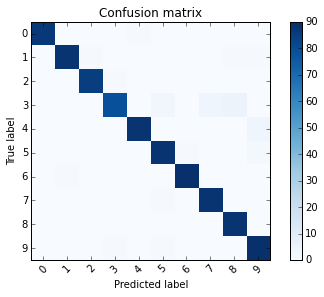

In [416]:
def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues):
    import numpy as np
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(digits.target_names))
    plt.xticks(tick_marks, digits.target_names, rotation=45)
    plt.yticks(tick_marks, digits.target_names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

plt.figure()
plot_confusion_matrix(metrics.confusion_matrix(expected, predicted))


In [30]:
from sklearn.externals import joblib

joblib.dump(classifier, "./machine2.pkl") 

['./machine2.pkl',
 './machine2.pkl_01.npy',
 './machine2.pkl_02.npy',
 './machine2.pkl_03.npy',
 './machine2.pkl_04.npy',
 './machine2.pkl_05.npy',
 './machine2.pkl_06.npy',
 './machine2.pkl_07.npy',
 './machine2.pkl_08.npy',
 './machine2.pkl_09.npy',
 './machine2.pkl_10.npy',
 './machine2.pkl_11.npy']

In [1045]:
import numpy as np
train = np.loadtxt('C:/Github/number_recognizer/train.txt')
len(train)

1000

In [1046]:
target = np.loadtxt('C:/Github/number_recognizer/target.txt')
len(target)

1000

In [1047]:
t = []
for i in range(len(train)):
    t.append(train[i].reshape(8,8))

Classification report for classifier SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0, degree=3,
  gamma=0.001, kernel='rbf', max_iter=-1, probability=False,
  random_state=None, shrinking=True, tol=0.001, verbose=False):
             precision    recall  f1-score   support

        0.0       0.58      0.67      0.62        51
        1.0       0.48      0.72      0.57        40
        2.0       0.37      0.51      0.43        45
        3.0       0.72      0.24      0.36        55
        4.0       0.97      0.51      0.67        55
        5.0       0.36      0.32      0.34        47
        6.0       0.43      0.51      0.46        57
        7.0       0.40      0.44      0.42        48
        8.0       0.70      0.67      0.69        52
        9.0       0.40      0.46      0.43        50

avg / total       0.55      0.50      0.50       500


Confusion matrix:
[[34  1  1  3  0  5  6  1  0  0]
 [ 0 29  9  0  0  0  0  1  0  1]
 [ 1  5 23  0  1  4  2  6  1  2]
 [ 6  3 12 13 

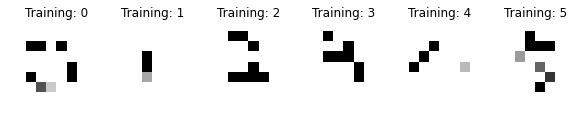

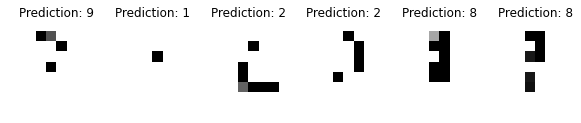

In [1048]:
images_and_labels = list(zip(t, target))

plt.figure(figsize=(10,5))
for index, (image, label) in enumerate(images_and_labels[:6]):
    plt.subplot(2, 6, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Training: %i' % label)

# 資料攤平:1797 x 8 x 8 -> 1797 x 64
# 這裏的-1代表自動計算，相當於 (n_samples, 64)
n_samples = len(t) #讀出資料庫中有幾張照片
data = train.reshape((n_samples, -1))

# 產生SVC分類器
#classifier = svm.SVC(gamma=0.001)

from sklearn.svm import SVC
from sklearn.cross_validation import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.cross_validation import cross_val_score
from sklearn.cross_validation import train_test_split
# 用前半部份的資料來訓練

#x = data
#y = target

#X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=0.5)

X = data[:n_samples / 2]
y = target[:n_samples / 2]
classifier=svm.SVC(gamma=0.001)
classifier.fit(X,y)


'''x = data[:n_samples / 2]
y = target[:n_samples / 2]

svc = SVC(kernel="linear")
classifier = RFECV(estimator=svc, step=1, cv=StratifiedKFold(y_train, 5),
              scoring='accuracy')
classifier.fit(X_train,y_train)
print("Optimal number of features : %d" % classifier.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(classifier.grid_scores_) + 1), classifier.grid_scores_)
plt.show()

print("precision : %s\n" % max(classifier.grid_scores_))'''



'''classifier=svm.SVC(gamma=0.00135)

x = data[:n_samples / 2]
y = target[:n_samples / 2]
#x = data
#y = target
cl=np.mean(cross_val_score(classifier,x,y,cv=StratifiedKFold(y, 5)))
print("precision : %s\n" % cl)

classifier.fit(x,y)'''


# Now predict the value of the digit on the second half:
expected = target[n_samples / 2:]
#expected = y_test
#利用後半部份的資料來測試分類器，共 899筆資料
predicted = classifier.predict(data[n_samples / 2:])
#predicted = classifier.predict(X_test)

print("Classification report for classifier %s:\n%s\n"
      % (classifier, metrics.classification_report(expected, predicted)))
print("Confusion matrix:\n%s" % metrics.confusion_matrix(expected, predicted))

plt.figure(figsize=(10,5))
images_and_predictions = list(zip(t[n_samples / 2:], predicted))
for index, (image, prediction) in enumerate(images_and_predictions[:6]):
    plt.subplot(2, 6, index + 7)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Prediction: %i' % prediction)

plt.show()

Please select the number to show : 999
the number is 7


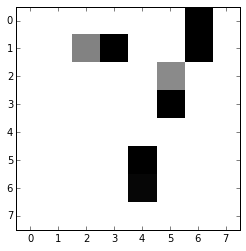

In [1049]:
%matplotlib inline
import matplotlib.pyplot as plt
str_num = input("Please select the number to show : ")
int_num = int(str_num)

print ("the number is %d" %target[int_num])
plt.imshow(train[int_num].reshape(8,8), cmap=plt.cm.gray_r, interpolation='nearest')


In [1050]:
import numpy as np
train = np.loadtxt('C:/Github/number_recognizer/train_1.txt')
len(train)

1000

In [1051]:
target = np.loadtxt('C:/Github/number_recognizer/target_1.txt')
len(target)

1000

In [1052]:
t = []
for i in range(len(train)):
    t.append(train[i].reshape(8,8))

Classification report for classifier SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0, degree=3,
  gamma=0.001, kernel='rbf', max_iter=-1, probability=False,
  random_state=None, shrinking=True, tol=0.001, verbose=False):
             precision    recall  f1-score   support

        0.0       0.83      0.61      0.70        62
        1.0       0.77      1.00      0.87        46
        2.0       0.82      0.80      0.81        59
        3.0       0.61      0.79      0.69        62
        4.0       0.81      0.67      0.73        45
        5.0       0.68      0.33      0.44        52
        6.0       0.64      0.62      0.63        40
        7.0       0.65      0.49      0.56        49
        8.0       0.67      0.74      0.70        35
        9.0       0.47      0.76      0.58        50

avg / total       0.70      0.68      0.67       500


Confusion matrix:
[[38  0  6  5  1  3  2  1  2  4]
 [ 0 46  0  0  0  0  0  0  0  0]
 [ 0  2 47  4  1  0  1  2  1  1]
 [ 0  3  3 49 

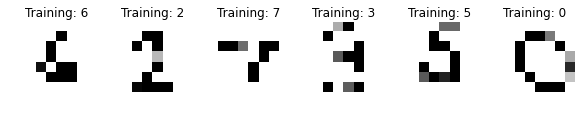

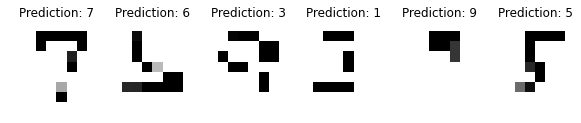

In [1053]:
images_and_labels = list(zip(t, target))

plt.figure(figsize=(10,5))
for index, (image, label) in enumerate(images_and_labels[:6]):
    plt.subplot(2, 6, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Training: %i' % label)

# 資料攤平:1797 x 8 x 8 -> 1797 x 64
# 這裏的-1代表自動計算，相當於 (n_samples, 64)
n_samples = len(t) #讀出資料庫中有幾張照片
data = train.reshape((n_samples, -1))

# 產生SVC分類器
#classifier = svm.SVC(gamma=0.001)

from sklearn.svm import SVC
from sklearn.cross_validation import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.cross_validation import cross_val_score
from sklearn.cross_validation import train_test_split
# 用前半部份的資料來訓練

'''
X = data
y = target

X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=0.5 )
classifier=svm.SVC(gamma=0.001)
classifier.fit(X_train,y_train)
'''
X = data[:n_samples / 2]
y = target[:n_samples / 2]

classifier=svm.SVC(gamma=0.001)
classifier.fit(X,y)


'''x = data[:n_samples / 2]
y = target[:n_samples / 2]

svc = SVC(kernel="linear")
classifier = RFECV(estimator=svc, step=1, cv=StratifiedKFold(y_train, 5),
              scoring='accuracy')
classifier.fit(X_train,y_train)
print("Optimal number of features : %d" % classifier.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(classifier.grid_scores_) + 1), classifier.grid_scores_)
plt.show()

print("precision : %s\n" % max(classifier.grid_scores_))'''

'''
cl=svm.SVC(gamma=0.00135)
#x = data[:n_samples / 2]
#y = target[:n_samples / 2]
x = data
y = target

for g in range(0,100):
    cl=svm.SVC(gamma= g / 10000.)
    print(cross_val_score(cl,X,y,cv=StratifiedKFold(y, 5)))
    print(np.mean(cross_val_score(cl,X,y,cv=StratifiedKFold(y, 5))))

classifier=np.mean(cross_val_score(cl,x,y,cv=StratifiedKFold(y, 5)))
print("precision : %s\n" % classifier)

classifier.fit(x,y)
'''

# Now predict the value of the digit on the second half:
expected = target[n_samples / 2:]
#expected = y_test
#利用後半部份的資料來測試分類器，共 899筆資料
predicted = classifier.predict(data[n_samples / 2:])
#predicted = classifier.predict(X_test)

print("Classification report for classifier %s:\n%s\n"
      % (classifier, metrics.classification_report(expected, predicted)))
print("Confusion matrix:\n%s" % metrics.confusion_matrix(expected, predicted))

plt.figure(figsize=(10,5))
images_and_predictions = list(zip(t[n_samples / 2:], predicted))
#images_and_predictions = list(zip(X_test, predicted))

for index, (image, prediction) in enumerate(images_and_predictions[:6]):
    plt.subplot(2, 6, index + 7)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    #plt.imshow(image.reshape(8,8), cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Prediction: %i' % prediction)


plt.show()